In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import simpledialog
from tkinter import messagebox
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from shapely.geometry import LineString
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
from IPython.display import display
from shapely.geometry import LineString
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from ipywidgets import Dropdown
from ipywidgets import interact
import numpy as np
import time
import matplotlib.pyplot as plt

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default


# Ruta al archivo KML
filename = "FORUM8 Rally Japan 2024.kml"
layers = fiona.listlayers(filename)

In [3]:
# Abre el archivo KML y lista las capas disponibles
filename = "FORUM8 Rally Japan 2024.kml"
layers = fiona.listlayers(filename)

# Cargar el archivo KML con geopandas
driver = "KML"

# Función para actualizar la capa y cargar los datos
def update_layer(selected_layer):
    global gdf
    global layer
    gdf = gpd.read_file(filename, driver=driver, layer=selected_layer)
    layer = selected_layer
    print(selected_layer)
    

# Crear un desplegable interactivo con las capas disponibles
interact(update_layer, selected_layer=layers);


interactive(children=(Dropdown(description='selected_layer', options=('Shakedown', 'Section 1', 'Sections 2, 3…

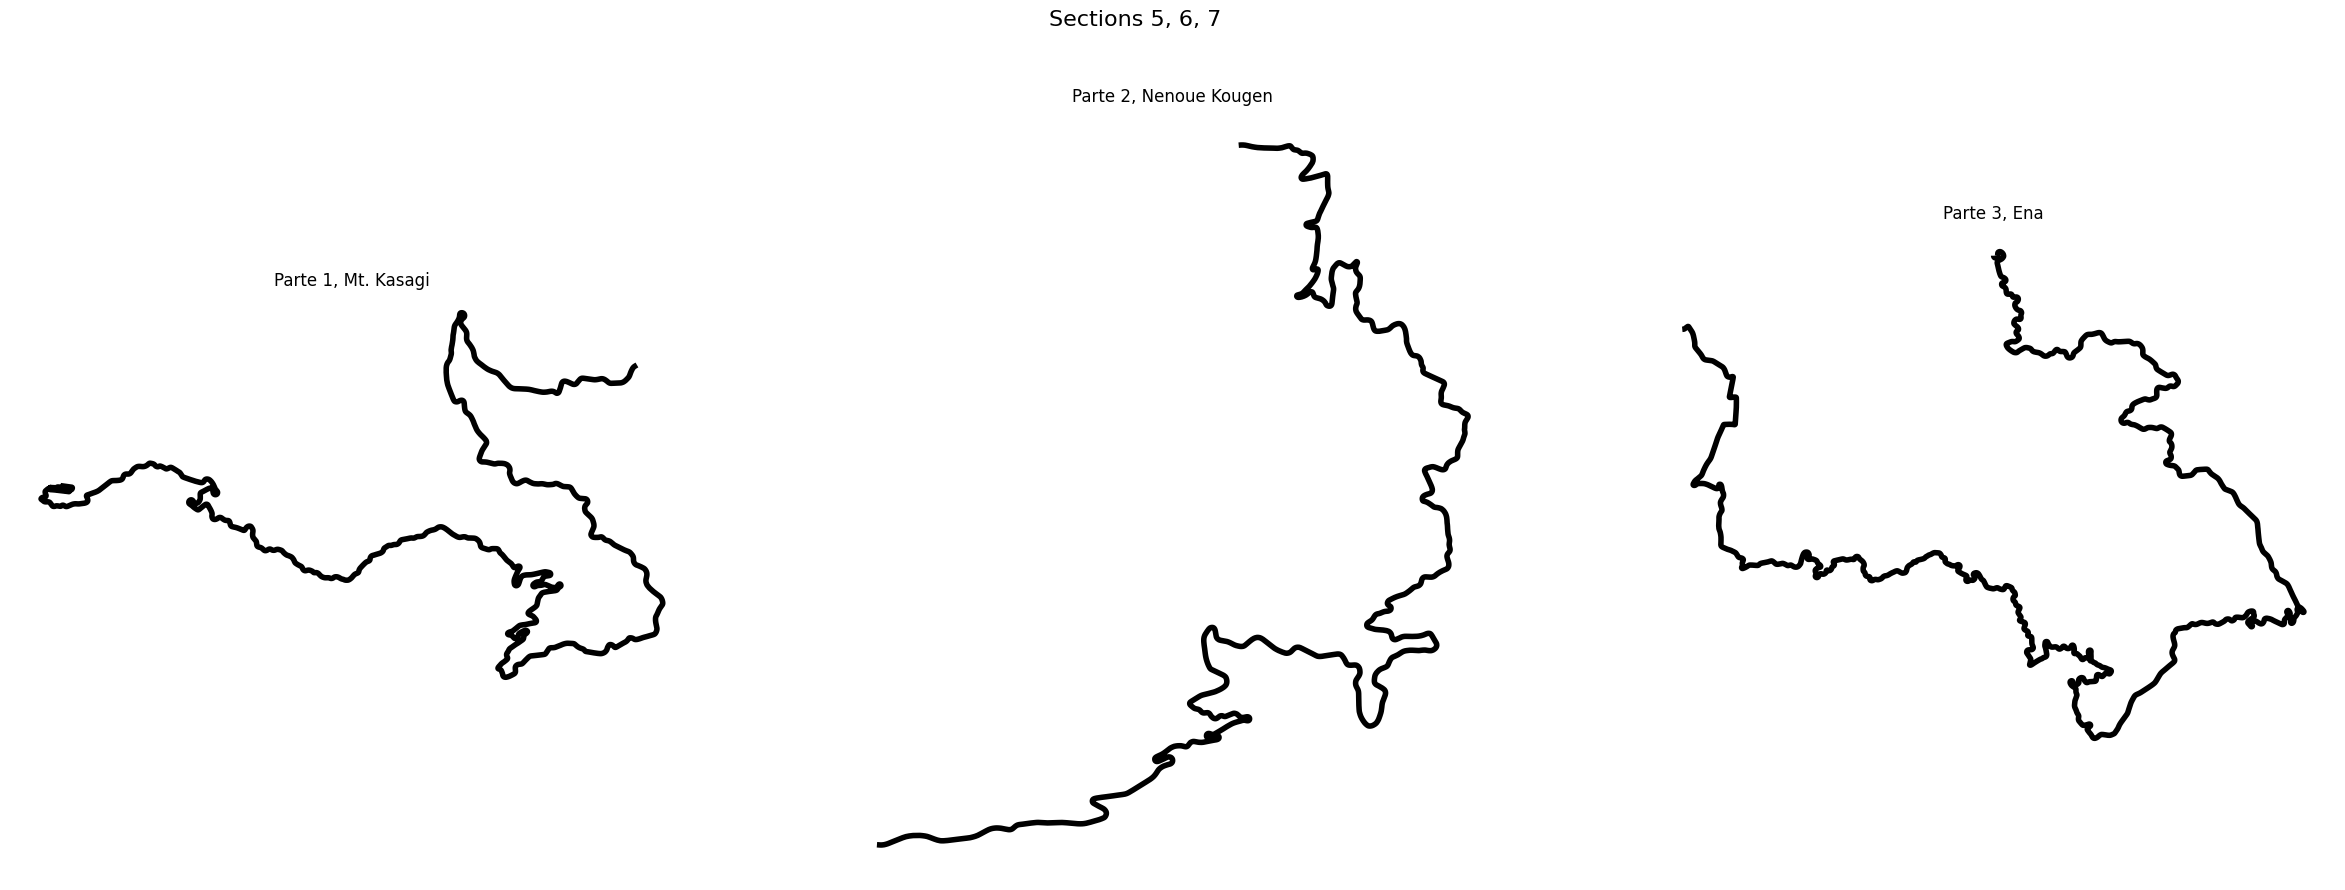

In [4]:
# Transformar a un CRS proyectado (por ejemplo, UTM) para calcular el centroide correctamente
# Usaremos el EPSG:3857 (Web Mercator) para esto
gdf_projected = gdf.to_crs(epsg=3857)

# Ahora calcula el centro de los datos geográficos en el CRS proyectado
center = [
    gdf_projected.geometry.centroid.to_crs(epsg=4326).y.mean(),  # Latitud
    gdf_projected.geometry.centroid.to_crs(epsg=4326).x.mean()   # Longitud
]


gdf_list = [gdf.iloc[[i]] for i in range(len(gdf))]

fig, axs = plt.subplots(1, len(gdf_list), figsize=(10 * len(gdf_list), 10 ))
fig.suptitle(layer, fontsize=16)

if len(gdf_list) == 1:
    gdf_list[0].plot(ax=axs, color="black", lw=4)
    axs.set_title(f"Seccion {1}, {gdf_list[0].iloc[0]['Name']}")
    axs.axis("off")
else:
    for i, gdf_part in enumerate(gdf_list):
        gdf_list[i].plot(ax=axs[i], color="black", lw=4)
        axs[i].set_title(f"Parte {i+1}, {gdf_list[i].iloc[0]['Name']}")
        axs[i].axis("off")

plt.show()

In [5]:
Names = []
for i in range(len(gdf_list)):
    Names.append(gdf_list[i]["Name"].iloc[0])
    
    
# Función para actualizar la capa y cargar los datos
def update_section(selected_section):
    global gdf
    global name
    gdf = next(gdf_part for gdf_part in gdf_list if gdf_part["Name"].iloc[0] == selected_section)
    name = selected_section

# Crear un desplegable interactivo con las capas disponibles
interact(update_section, selected_section=Names);

interactive(children=(Dropdown(description='selected_section', options=('Mt. Kasagi', 'Nenoue Kougen', 'Ena'),…

Longitud del tramo: 11.62 Km


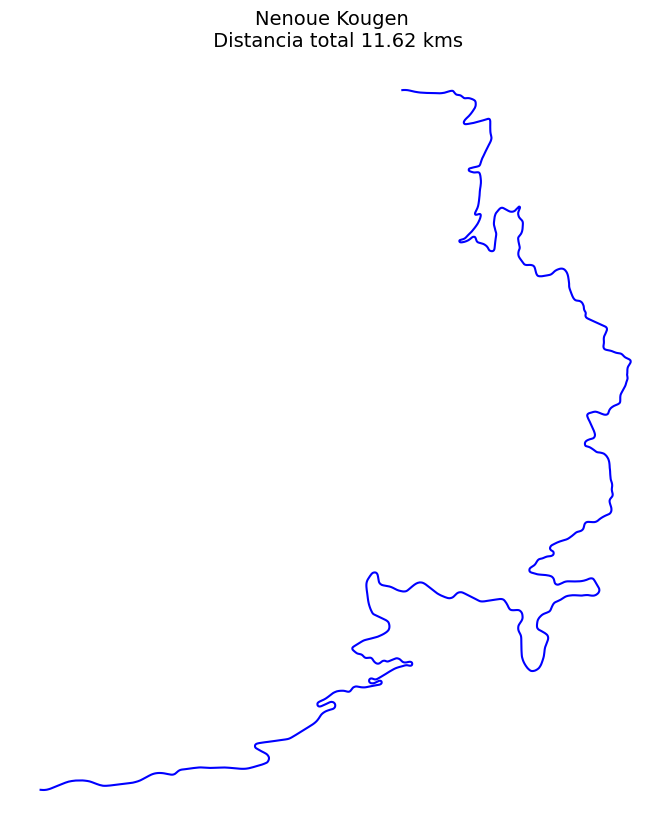

In [6]:
# Transformar a un CRS proyectado (por ejemplo, UTM o Web Mercator EPSG:3857)
gdf_projected = gdf.to_crs(epsg=3099)

# Calcular la longitud de cada tramo en metros
gdf_projected['length_m'] = gdf_projected.length

# Convertir la longitud a kilómetros
gdf_projected['length_km'] = gdf_projected['length_m'] / 1000

# Mostrar las longitudes en kilómetros
longitud_total = gdf_projected['length_km'].iloc[0]

print(f"Longitud del tramo: {gdf_projected['length_km'].iloc[0]:.2f} Km")  # 'name' es un ejemplo de columna, cámbialo según tus datos  



# Crear una figura y un eje con matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plotea las geometrías usando geopandas
gdf.plot(ax=ax, color='blue', edgecolor='black')

# Personalizar el gráfico
ax.set_title(f"{name} \n Distancia total {longitud_total:.2f} kms", fontsize=14)
ax.set_xlabel("Longitud", fontsize=10)
ax.set_ylabel("Latitud", fontsize=10)
ax.axis("off")
plt.show()


